<a href="https://colab.research.google.com/github/g-e-mm/Keras_Fashion_Data/blob/main/Fashion_MNIST_Keras_TF_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> FASHION MNIST RECOGNISER

Here we are given a  dataset of images of various fashion items that we must identify using Keras and Tensorflow

1. Load the dataset and Libraries
2. Data Pre-Processing
3. Declare the model and Layers
  * Sequential
  * Functional
* Layers
  * Dense , Dropout
  * Number of Neurons , Activation Function
4. Compile the model
  * Optimizer
    * SGD , Adam
  * Loss Function
    * Cross Entropy , MSE , RMSE
  * Metrics
    * Accuracy , F1 Score, Precision , Recall)
5. Fit the model
  * Pass X Train and Y Train
  * Pass X Test and Y Test
  * Declare number of Epochs
  * Declare Batch Size
6. Predict and Evaluate the model
7. Conclude with the findings

# Loading Dataset and Libraries

Dataset: https://drive.google.com/file/d/1mEwKRerQEwGz07tbSObAyFPUhlNP6JMg/view?usp=drive_link

In [10]:
!unzip '/content/drive/MyDrive/IMARTICUS/Keras_Fashion_MNIST/Fashion_MNIST.zip'

Archive:  /content/drive/MyDrive/IMARTICUS/Keras_Fashion_MNIST/Fashion_MNIST.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [13]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [17]:
# prompt: train.head
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,227,211,171,191,236,228,172,0,0,0,...,253,0,112,255,217,211,227,245,195,194,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,136,153,168,252,174,136,166,130,123,131,...,0,5,194,193,204,104,116,241,217,196,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,0,119,173,239,112,0,189,125,0,0,...,3,0,0,214,232,229,249,245,248,252,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [25]:
print("the minimum value of the label is", train['label'].min(), "and the maximum value of the label is", train['label'].max())

the minimum value of the label is 0 and the maximum value of the label is 9


#Data Pre-Processing


In [26]:
x = train.drop('label', axis=1)
y = train['label']

In [28]:
#shape of the data
x.shape, y.shape

((60000, 784), (60000,))

## Train Test Split

with this, we can now do the train test split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [32]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((48000, 784), (48000,), (12000, 784), (12000,))

## Visualisation

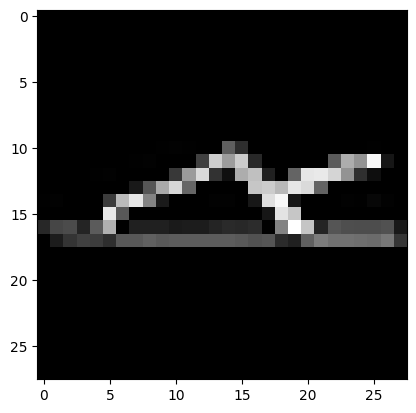

In [36]:
#features = train.columns[1:]  # Assuming the first column is 'label' and the rest are pixel data
features = ['pixel{}'.format(pixel_num) for pixel_num in range(1,785)]
rows_to_examine = 7
image_data = np.reshape(train[features].iloc[rows_to_examine].to_numpy(),(28,28))
plt.imshow(image_data, cmap='gray')
plt.show()

## Model Evaluation Function

In [41]:
#model evaluation function
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual , predicted)
  clas_rep = classification_report(actual , predicted)
  acc_score = accuracy_score(actual , predicted)

  print("The Accuracy of the Model is:" , round(acc_score , 2))
  print(conf_matrix)
  print(clas_rep)

##One Hot Encoding

In [42]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

# Declaring the Model and the Layers

declare the model as sequential and adding 5 layers of batch size 256 with a dropout layer that drops out 20% of entries

In [43]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) #input layer
model.add(Dropout(0.2)) #dropout layer
model.add(Dense(256, activation='relu')) # Layer 2
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu')) # Layer 3
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu')) # Layer 4
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu')) # Layer 5
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 733,194 (2.80 MB)

 Trainable params: 733,194 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

#Compiling the model

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the Model

In [47]:
hist = model.fit(x_train, y_train_ohe, epochs=100, batch_size=256, validation_split=0.2)

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.3970 - loss: 9.6410 - val_accuracy: 0.7706 - val_loss: 0.6538
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7037 - loss: 0.8369 - val_accuracy: 0.8058 - val_loss: 0.5661
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.7578 - loss: 0.6901 - val_accuracy: 0.8293 - val_loss: 0.4910
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.7850 - loss: 0.6093 - val_accuracy: 0.8384 - val_loss: 0.4594
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8087 - loss: 0.5423 - val_accuracy: 0.8419 - val_loss: 0.4420
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8225 - loss: 0.5099 - val_accuracy: 0.8477 - val_loss: 0.4347
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.8293 - loss: 0.4869 - val_accuracy: 0.8522 - val_loss: 0.4369
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.8345 - loss: 0.46

# Predict and Evaluate the Model

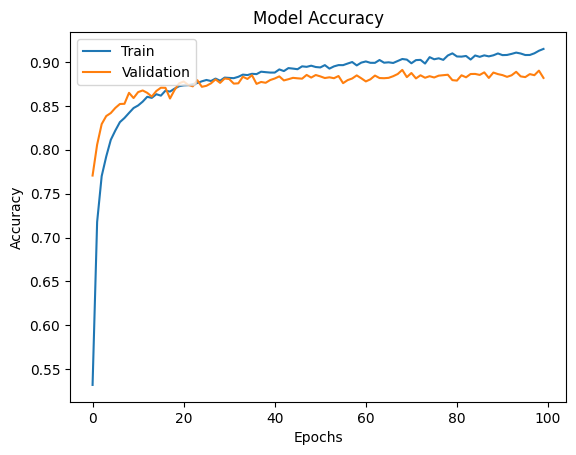

In [48]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

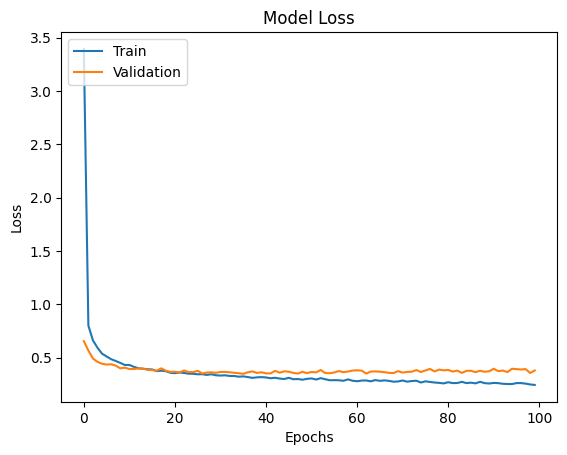

In [49]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train' , 'Validation'] , loc = 'upper left')
plt.show()

In [50]:
y_hat_train_dense = np.argmax(model.predict(x_train) , axis = 1)
y_hat_test_dense = np.argmax(model.predict(x_test) , axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


In [63]:
predictions = model.predict(x_test)
predictions_labels = np.argmax(predictions,axis=1)

print(predictions_labels[:10])
y_test_array = y_test.to_numpy().reshape(-1, 1)  # Reshape to 2D
print(np.argmax(y_test_array,axis=1)[:10])

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
[8 4 7 8 6 0 3 9 9 3]
[0 0 0 0 0 0 0 0 0 0]


In [53]:
model_eval(y_train, y_hat_train_dense)

The Accuracy of the Model is: 0.92
[[4369    3   31   73    4    0  359    0   11    0]
 [   3 4771    0   28    2    0    3    0    2    0]
 [  56    1 4210   46  231    0  207    0    0    0]
 [  57   10    6 4560   93    0   55    0    2    0]
 [   3    5  366  176 4083    0  221    0    2    0]
 [   0    0    0    1    0 4707    0   34    2   41]
 [ 545    3  331   99  271    0 3519    0    8    0]
 [   0    0    0    0    0   23    0 4629    2  202]
 [   6    1    4   14    7    5   39    5 4700    2]
 [   0    0    0    0    0   13    0   29    0 4709]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4850
           1       1.00      0.99      0.99      4809
           2       0.85      0.89      0.87      4751
           3       0.91      0.95      0.93      4783
           4       0.87      0.84      0.86      4856
           5       0.99      0.98      0.99      4785
           6       0.80      0.74      0.77      4776
 

In [56]:
model_eval(y_test, y_hat_test_dense)

The Accuracy of the Model is: 0.89
[[ 981    3   14   34    1    0  109    0    8    0]
 [   4 1164    3   17    0    0    1    0    2    0]
 [   9    0 1051   10   90    1   86    0    2    0]
 [  28   13    7 1126   23    0   20    0    0    0]
 [   0    0  112   47  918    0   63    0    4    0]
 [   0    0    0    0    0 1147    0   30    5   33]
 [ 175    3  132   33   87    1  778    0   15    0]
 [   0    0    0    0    0   15    0 1066    1   62]
 [   2    0    4    7    5    1   14    5 1175    4]
 [   0    0    0    0    0    9    0   17    0 1223]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1150
           1       0.98      0.98      0.98      1191
           2       0.79      0.84      0.82      1249
           3       0.88      0.93      0.90      1217
           4       0.82      0.80      0.81      1144
           5       0.98      0.94      0.96      1215
           6       0.73      0.64      0.68      1224
 

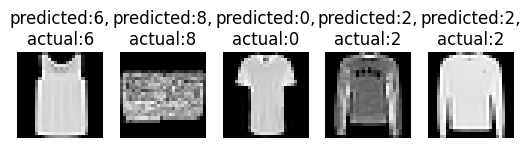

In [65]:
num_images = 5
indices = np.random.choice(len(x_test),num_images,replace=False)
y_test_array = y_test.to_numpy() # Convert to NumPy array

for i,index in enumerate(indices):

  plt.subplot(1,num_images,i+1)
  plt.imshow(x_test.iloc[index].values.reshape(28,28),cmap='gray')
  plt.title(f'predicted:{predictions_labels[index]},\nactual:{y_test_array[index]}')
  plt.axis('off')

plt.show() # Display the plot

#Conclusion

* The analysis of the Fashion MNIST dataset using a sequential neural network model showed promising results.
* The model exhibits low bias and low variance, indicating a good fit to the training data and ability to generalize.
* However, there is still room for improvement, suggesting that further optimization could enhance performance.